### Data Exploration Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn import preprocessing

In [2]:
df = pd.read_csv("dataset1.csv")
df.head()

,Label,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,...,area_102,area_103,area_104,area_105,area_106,area_107,area_108,area_109,area_110,area_111
0,normal,42026.13444,0.837992,0.680368,-0.046693,-1.768394,58432.45711,15.559444,2.089228,0.653725,...,17.391097,121.265112,13.974210,0.937043,0.035898,2.370000e-06,-0.787742,1.724785,0.086712,0.000062
1,normal,40953.90720,0.881848,0.596231,-0.469329,-1.440954,52624.47374,15.451862,2.054364,0.549743,...,18.240026,90.087976,13.814942,0.767752,0.034853,5.560000e-06,-0.684219,1.451970,0.078986,0.000069
2,normal,56557.81344,0.962359,0.448852,-0.693169,0.006798,66269.16155,15.502896,2.133265,0.349870,...,17.269445,48.388665,13.604552,0.531576,0.027222,-1.460000e-13,-0.664139,1.195714,0.053554,0.000371
3,normal,39446.13426,0.981931,0.655955,-0.406997,-1.252084,56018.46915,15.036336,2.200908,0.573151,...,13.255512,276.967530,13.334357,1.249678,0.066020,-3.910000e-15,-1.273933,2.523611,0.145711,0.000391
4,normal,34057.74479,0.697319,0.663547,0.195127,-1.751851,45253.55596,15.505998,2.164484,0.638541,...,20.416435,87.259274,13.984927,0.733262,0.029526,3.230000e-06,-0.662974,1.396236,0.073232,0.000062


In [3]:
df.isnull()

,Label,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,...,area_102,area_103,area_104,area_105,area_106,area_107,area_108,area_109,area_110,area_111
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


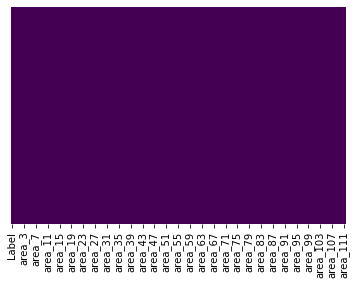

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.shape

(684, 113)

In [6]:
from sklearn.preprocessing import LabelEncoder
le_Label =LabelEncoder()
df['Output'] = le_Label.fit_transform(df['Label'])

In [7]:
df.head(10)

,Label,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,...,area_103,area_104,area_105,area_106,area_107,area_108,area_109,area_110,area_111,Output
0,normal,42026.13444,0.837992,0.680368,-0.046693,-1.768394,58432.45711,15.559444,2.089228,0.653725,...,121.265112,13.974210,0.937043,0.035898,2.370000e-06,-0.787742,1.724785,0.086712,0.000062,1
1,normal,40953.90720,0.881848,0.596231,-0.469329,-1.440954,52624.47374,15.451862,2.054364,0.549743,...,90.087976,13.814942,0.767752,0.034853,5.560000e-06,-0.684219,1.451970,0.078986,0.000069,1
2,normal,56557.81344,0.962359,0.448852,-0.693169,0.006798,66269.16155,15.502896,2.133265,0.349870,...,48.388665,13.604552,0.531576,0.027222,-1.460000e-13,-0.664139,1.195714,0.053554,0.000371,1
3,normal,39446.13426,0.981931,0.655955,-0.406997,-1.252084,56018.46915,15.036336,2.200908,0.573151,...,276.967530,13.334357,1.249678,0.066020,-3.910000e-15,-1.273933,2.523611,0.145711,0.000391,1
4,normal,34057.74479,0.697319,0.663547,0.195127,-1.751851,45253.55596,15.505998,2.164484,0.638541,...,87.259274,13.984927,0.733262,0.029526,3.230000e-06,-0.662974,1.396236,0.073232,0.000062,1
5,normal,49865.23168,1.111153,0.658072,-0.596918,-0.912582,74842.27097,15.092209,2.383023,0.557089,...,277.432751,13.414107,1.079650,0.061490,-3.640000e-15,-1.223753,2.303403,0.139678,0.000367,1
6,normal,38770.86386,0.941749,0.655675,-0.262501,-1.388371,54211.39660,15.105866,2.211260,0.581429,...,235.032308,13.374994,1.248555,0.059140,-3.910000e-15,-1.344502,2.593057,0.134912,0.000315,1
7,normal,43488.50811,0.917344,0.659089,-0.413405,-1.581987,60487.39489,15.464659,2.155900,0.618180,...,111.828498,13.930052,0.920173,0.035201,7.150000e-07,-0.812870,1.733044,0.084553,0.000064,1
8,normal,33543.26843,0.909969,0.675501,-0.218216,-1.416255,47343.50093,14.334596,2.300205,0.604931,...,299.444352,12.746416,1.474956,0.071376,-3.910000e-15,-1.238696,2.713652,0.152057,0.001101,1
9,normal,38147.05587,0.867610,0.574910,-0.545308,-1.381755,47629.12069,15.355763,2.237460,0.525079,...,71.981715,13.788932,1.104614,0.029261,1.210000e-08,-0.635057,1.739671,0.071183,0.000071,1


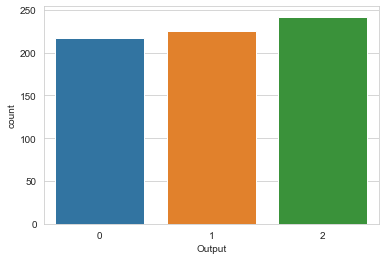

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Output',data=df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df.Output
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Output, dtype: int32

In [11]:
X = df.drop(['Output','Label'],axis='columns')
X.head()

,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,...,area_102,area_103,area_104,area_105,area_106,area_107,area_108,area_109,area_110,area_111
0,42026.13444,0.837992,0.680368,-0.046693,-1.768394,58432.45711,15.559444,2.089228,0.653725,1.005898,...,17.391097,121.265112,13.974210,0.937043,0.035898,2.370000e-06,-0.787742,1.724785,0.086712,0.000062
1,40953.90720,0.881848,0.596231,-0.469329,-1.440954,52624.47374,15.451862,2.054364,0.549743,1.186299,...,18.240026,90.087976,13.814942,0.767752,0.034853,5.560000e-06,-0.684219,1.451970,0.078986,0.000069
2,56557.81344,0.962359,0.448852,-0.693169,0.006798,66269.16155,15.502896,2.133265,0.349870,1.010439,...,17.269445,48.388665,13.604552,0.531576,0.027222,-1.460000e-13,-0.664139,1.195714,0.053554,0.000371
3,39446.13426,0.981931,0.655955,-0.406997,-1.252084,56018.46915,15.036336,2.200908,0.573151,1.164526,...,13.255512,276.967530,13.334357,1.249678,0.066020,-3.910000e-15,-1.273933,2.523611,0.145711,0.000391
4,34057.74479,0.697319,0.663547,0.195127,-1.751851,45253.55596,15.505998,2.164484,0.638541,0.379985,...,20.416435,87.259274,13.984927,0.733262,0.029526,3.230000e-06,-0.662974,1.396236,0.073232,0.000062


In [12]:
min_max_scaler=MinMaxScaler()
X = min_max_scaler.fit_transform(X) 
# =============================================================================
# feature reduction (K-PCA)
# =============================================================================
transformer = KernelPCA(n_components=56, kernel='linear')
X = transformer.fit_transform(X)

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
svm_c_v = cross_val_score(SVC(), X_test, y_test)
dtc_c_v = cross_val_score(DecisionTreeClassifier(), X_test, y_test)
rfc_c_v = cross_val_score(RandomForestClassifier(), X_test, y_test)
adatb_c_v = cross_val_score(AdaBoostClassifier(n_estimators=100, random_state=0), X_test, y_test)
gbc_c_v = cross_val_score(GradientBoostingClassifier(random_state=0), X_test, y_test)


In [17]:
svm_c_v

array([0.8       , 0.64705882, 0.82352941, 0.76470588, 0.76470588])

In [18]:
dtc_c_v

array([0.62857143, 0.55882353, 0.58823529, 0.58823529, 0.41176471])

In [19]:
rfc_c_v

array([0.74285714, 0.70588235, 0.64705882, 0.73529412, 0.76470588])

In [20]:
gbc_c_v

array([0.68571429, 0.79411765, 0.64705882, 0.70588235, 0.67647059])

In [21]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear'],
            'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,60,70,80],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
            
        }
    },
    
    'adaboost': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [100],
            'random_state': [0]
        }  
    },
    
    'xgboost': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'random_state': [0]
            
        }  
    }
     
}

In [22]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.827523,"{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}"
1,random_forest,0.761700,"{'max_features': 'sqrt', 'n_estimators': 80}"
2,decision_tree,0.596479,{'criterion': 'entropy'}
3,adaboost,0.660799,"{'n_estimators': 100, 'random_state': 0}"
4,xgboost,0.745578,{'random_state': 0}


In [23]:
from sklearn.metrics import confusion_matrix

In [73]:
model = SVC(kernel='rbf',C=10,gamma=0.02)
model.fit(X_train,y_train)
model.score(X_test, y_test)



0.8245614035087719

In [25]:
y_predicted = model.predict(X_test)
y_predicted

array([2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0])

In [26]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[52,  2,  8],
       [ 1, 43,  5],
       [ 7,  8, 45]], dtype=int64)

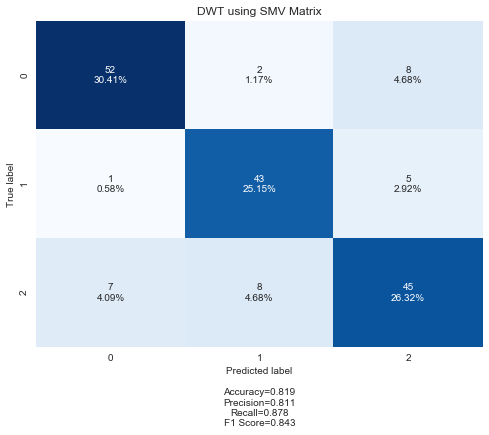

In [27]:
from cf_matrix import make_confusion_matrix
make_confusion_matrix(cm, figsize=(8,6), cbar=False, title='DWT using SMV Matrix')

In [28]:
model1 = RandomForestClassifier(n_jobs=-1,max_features= 'log2' ,n_estimators=150, oob_score = False)
model1.fit(X_train,y_train)
model1.score(X_test, y_test)

0.783625730994152

In [29]:
y_predicted1 = model1.predict(X_test)
y_predicted1

array([2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0])

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predicted, average=None)

array([0.83870968, 0.87755102, 0.75      ])

In [31]:
cm1 = confusion_matrix(y_test, y_predicted1)
cm1

array([[45,  5, 12],
       [ 1, 44,  4],
       [ 6,  9, 45]], dtype=int64)

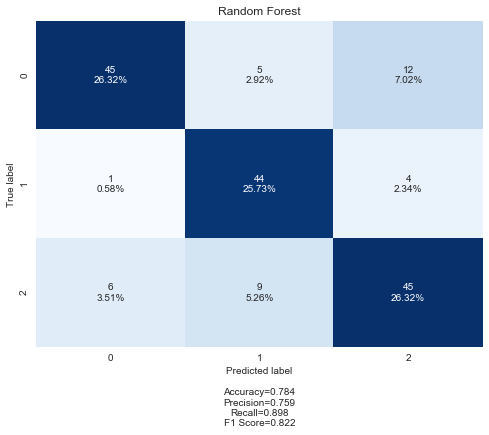

In [32]:
from cf_matrix import make_confusion_matrix
make_confusion_matrix(cm1, figsize=(8,6), cbar=False, title='Random Forest')

In [33]:
model2=DecisionTreeClassifier(random_state = 15,criterion="entropy" , max_features = "auto", class_weight = "balanced",max_depth = None)
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=15, splitter='best')

In [34]:
y_predicted2 = model2.predict(X_test)
y_predicted2

array([1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2])

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predicted2, average=None)


array([0.41935484, 0.75510204, 0.58333333])

In [36]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predicted2, average=None)

array([0.65      , 0.56923077, 0.53030303])

In [37]:
cm2 = confusion_matrix(y_test, y_predicted2)
cm2

array([[26, 14, 22],
       [ 3, 37,  9],
       [11, 14, 35]], dtype=int64)

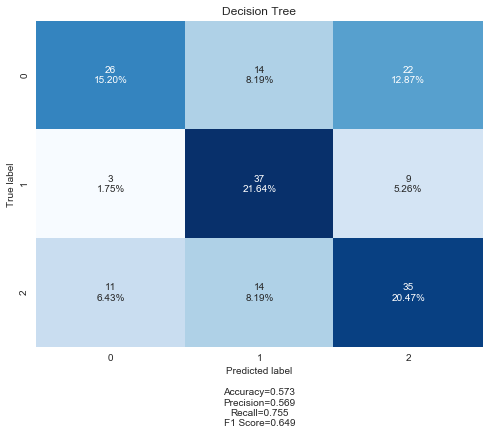

In [38]:
from cf_matrix import make_confusion_matrix
make_confusion_matrix(cm2, figsize=(8,6), cbar=False, title='Decision Tree')

In [39]:
model4=GradientBoostingClassifier(random_state=30,n_estimators=90)
model4.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=90,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=30, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
y_predicted3 = model4.predict(X_test)
y_predicted3

array([2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2])

In [41]:
cm3 = confusion_matrix(y_test, y_predicted3)
cm3

array([[44,  4, 14],
       [ 1, 43,  5],
       [ 5,  8, 47]], dtype=int64)

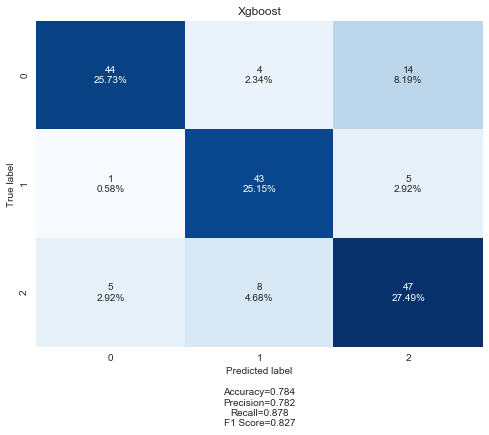

In [42]:
from cf_matrix import make_confusion_matrix
make_confusion_matrix(cm3, figsize=(8,6), cbar=False, title='Xgboost')

In [43]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predicted, average='micro')

0.8187134502923976

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted3, average=None)

array([0.78571429, 0.82692308, 0.74603175])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted1)

0.783625730994152